In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


In [2]:
df=pd.read_csv('1788408-1767133-1729258-1613615-Stock_Price_data_set_(1).csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
df.shape

(1009, 7)

In [6]:
df.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
unique,1009,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-02-05,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,NaN,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,NaN,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,NaN,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,NaN,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [8]:
df.count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [10]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


# Performing some explonatory data analysis

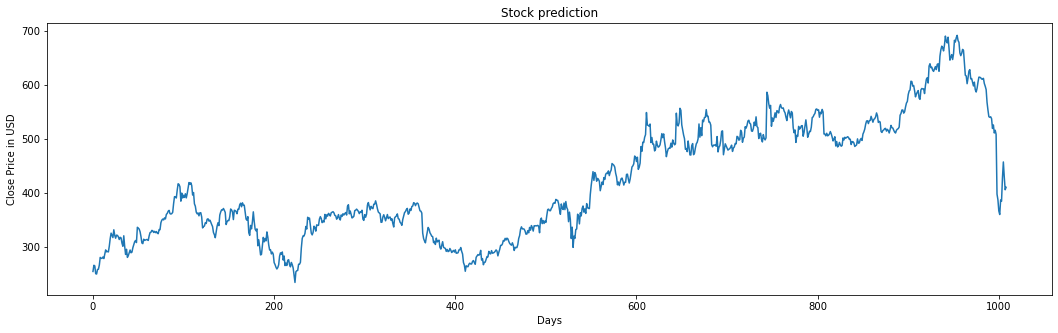

In [11]:
plt.figure(figsize=(18,5))
plt.title("Stock prediction")
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
plt.plot(df['Close'])
plt.show()
#Viulasie the close price


In [12]:
df = df[['Close']]
df.head(4)

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006


In [13]:
Future_days=25
#Creating a variable to predict the 'X' days out into future

In [14]:
df['Prediction'] = df[['Close']].shift(-Future_days)
df.head(4)
#Create a new Column (target) shifted 'X units/days up

C:\Users\deven_usg6wwo\AppData\Local\Temp\ipykernel_1552\2911931139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-Future_days)


,Close,Prediction
0,254.259995,315.880005
1,265.720001,321.549988
2,264.559998,321.089996
3,250.100006,318.450012


In [15]:
x = np.array(df.drop(['Prediction'],1))[:-Future_days]
print(x)
#Create the feature dataset (x) and convert it to numpy array

[[254.259995]
 [265.720001]
 [264.559998]
 [250.100006]
 [249.470001]
 [257.950012]
 [258.269989]
 [266.      ]
 [280.269989]
 [278.519989]
 [278.549988]
 [281.040009]
 [278.140015]
 [285.929993]
 [294.160004]
 [290.609985]
 [291.380005]
 [290.390015]
 [301.049988]
 [315.      ]
 [325.220001]
 [321.160004]
 [317.      ]
 [331.440002]
 [321.299988]
 [315.880005]
 [321.549988]
 [321.089996]
 [318.450012]
 [313.480011]
 [317.5     ]
 [316.480011]
 [306.700012]
 [300.940002]
 [320.350006]
 [300.690002]
 [285.769989]
 [295.350006]
 [280.290009]
 [283.670013]
 [288.940002]
 [293.970001]
 [288.850006]
 [289.929993]
 [298.070007]
 [303.670013]
 [309.25    ]
 [311.649994]
 [307.779999]
 [336.059998]
 [334.519989]
 [332.700012]
 [327.769989]
 [318.690002]
 [307.019989]
 [305.76001 ]
 [313.980011]
 [311.76001 ]
 [312.459991]
 [313.299988]
 [313.359985]
 [311.690002]
 [320.089996]
 [326.26001 ]
 [326.890015]
 [330.299988]
 [329.600006]
 [326.459991]
 [328.529999]
 [326.130005]
 [328.190002]
 [325.

C:\Users\deven_usg6wwo\AppData\Local\Temp\ipykernel_1552\629574850.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(['Prediction'],1))[:-Future_days]


In [16]:
y = np.array(df['Prediction'])[:-Future_days]
print(y)
#Create the target Data Set (y) and convert into numpy array and get all target values except last 'X' rows/days


[315.880005 321.549988 321.089996 318.450012 313.480011 317.5
 316.480011 306.700012 300.940002 320.350006 300.690002 285.769989
 295.350006 280.290009 283.670013 288.940002 293.970001 288.850006
 289.929993 298.070007 303.670013 309.25     311.649994 307.779999
 336.059998 334.519989 332.700012 327.769989 318.690002 307.019989
 305.76001  313.980011 311.76001  312.459991 313.299988 313.359985
 311.690002 320.089996 326.26001  326.890015 330.299988 329.600006
 326.459991 328.529999 326.130005 328.190002 325.220001 324.179993
 331.820007 331.619995 344.720001 349.290009 351.290009 349.730011
 353.540009 351.600006 359.929993 361.809998 365.799988 367.450012
 361.399994 360.570007 361.450012 363.829987 379.929993 392.869995
 391.980011 390.399994 404.980011 416.76001  415.440002 411.089996
 384.480011 399.390015 390.390015 395.420013 391.429993 398.179993
 390.519989 398.390015 408.25     418.970001 415.630005 418.649994
 413.5      395.799988 400.480011 379.480011 375.130005 364.230011


In [17]:
x_train,x_test,y_train ,y_test = train_test_split(x,y,test_size =
0.25)
#Splits the data into 75% training and 75% testing


In [18]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
#Create a models
#Create a descison tree regressor model

In [19]:
lr = LinearRegression().fit(x_train,y_train)
#Create a Linear Regression model


In [20]:
x_future = df.drop(['Prediction'],1)[:-Future_days]
x_future = x_future.tail(Future_days)
x_future = np.array(x_future)
x_future
#Get the last rows of feature data set



C:\Users\deven_usg6wwo\AppData\Local\Temp\ipykernel_1552\238481203.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Prediction'],1)[:-Future_days]


array([[658.289978],
       [665.640015],
       [663.840027],
       [641.900024],
       [617.77002 ],
       [616.469971],
       [602.130005],
       [612.690002],
       [625.580017],
       [628.080017],
       [611.      ],
       [611.659973],
       [604.559998],
       [597.98999 ],
       [605.039978],
       [591.059998],
       [586.72998 ],
       [593.73999 ],
       [604.919983],
       [614.23999 ],
       [614.090027],
       [613.119995],
       [610.710022],
       [610.539978],
       [612.090027]])

In [21]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model tree Prediction


[602.440002 663.840027 591.150024 567.52002  541.059998 541.059998
 651.450012 457.130005 537.219971 678.799988 525.690002 510.799988
 515.859985 633.799988 397.5      387.149994 366.420013 674.049988
 386.700012 384.359985 384.359985 457.130005 429.480011 429.480011
 410.170013]



In [22]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)
#Show the model linear regrssion prediction


[635.46903419 642.01195333 640.40962454 620.878884   599.39862954
 598.24134074 585.4760665  594.87645543 606.35099983 608.57647133
 593.37203492 593.95953536 587.63921856 581.79067234 588.06649128
 575.62167247 571.76713981 578.00737079 587.9596731  596.25623708
 596.12274173 595.2592303  593.11389981 592.96252858 594.34236453]


In [23]:
#Visualize the data
Prediction = tree_prediction

In [24]:
valid = df[x.shape[0]:]
valid['Prediction'] = Prediction

C:\Users\deven_usg6wwo\AppData\Local\Temp\ipykernel_1552\289610670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Prediction


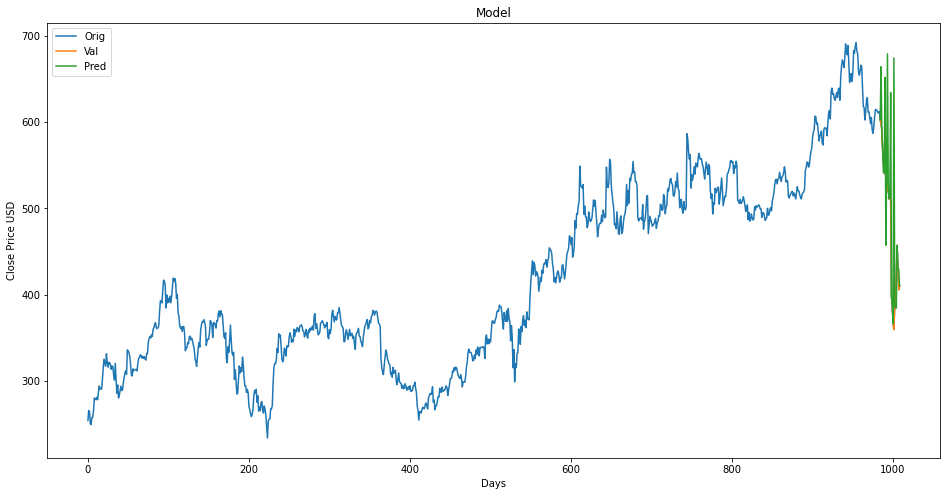

In [25]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD")
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val','Pred'])


In [26]:
Prediction = lr_prediction

In [27]:
valid = df[x.shape[0]:]
valid['Prediction'] = Prediction

C:\Users\deven_usg6wwo\AppData\Local\Temp\ipykernel_1552\289610670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Prediction


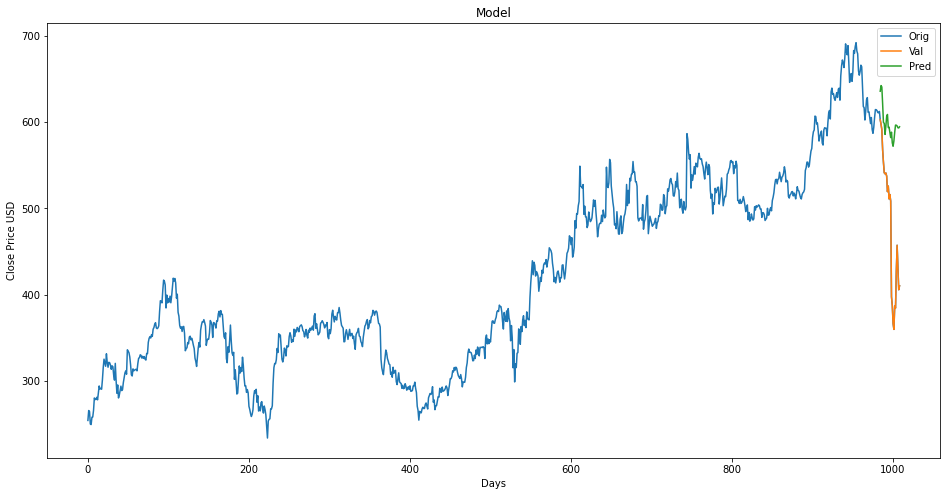

In [28]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD")
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val','Pred'])


# Building the Machine Learning Model

In [29]:
from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [30]:
# training testing and splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [31]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (787, 1)
The size of training output is (787,)
**************************************************
The size of testing input is (197, 1)
The size of testing output is (197,)


# Linear Regression

In [32]:
#Applying standard scaler on the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(X_train)
scale.transform(X_test)

array([[ 0.96012332],
       [-1.04649861],
       [ 0.95750556],
       [-1.23959593],
       [-0.56199543],
       [ 0.01088684],
       [ 0.58097036],
       [-0.62879852],
       [ 0.74536017],
       [-0.62220838],
       [-0.46224193],
       [ 0.15893699],
       [ 0.79889289],
       [ 1.16838669],
       [-0.5155942 ],
       [-0.80275741],
       [-0.97879272],
       [ 0.96499795],
       [ 1.20639191],
       [-0.02612576],
       [-0.71636464],
       [-0.83110375],
       [ 0.75682493],
       [-1.34350171],
       [ 0.76314427],
       [-0.80772268],
       [-1.20059727],
       [-0.50629594],
       [-0.62500687],
       [-0.60830603],
       [-0.49374792],
       [-0.94990504],
       [-1.30053123],
       [-0.57670995],
       [ 0.74247132],
       [-1.42583229],
       [-0.4742486 ],
       [-0.78614694],
       [-0.91198963],
       [-0.8073615 ],
       [-0.5024142 ],
       [-0.4953728 ],
       [ 0.14015974],
       [-0.39092512],
       [-0.83525629],
       [ 0

In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
#Importing the algorithm

In [34]:
reg.fit(X_train, y_train)
#Fitting the model on training data

LinearRegression()

In [35]:
m = reg.coef_
c = reg.intercept_
m,c
#Checking the coefficient(slope) and intercepts

(array([0.89029646]), 49.55459699005638)

In [36]:
y_pred_train = reg.predict(X_train)
#Testing the model

#Predicting the target: price against the predictors in the training data set
#Predicted data stored in y_pred_train

In [37]:
y_pred_test = reg.predict(X_test)
#Predicting the target: price against the predictors in the testing data set
#Predicted data stored in y_pred_test

In [38]:
r2_S = r2_score(y_train, y_pred_train)
r2_S
#Evaluating the model

0.8182985261420042

In [39]:
r2_S = r2_score(y_test, y_pred_test)
r2_S

0.8101390490863435

# Ridge Regressor

In [40]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [41]:
y_train_pred =ridge_regressor.predict(X_train) ##Predict train result
y_test_pred =ridge_regressor.predict(X_test) ##Predict test result

In [44]:
print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  46.47215585826754
Mean absolute % error:  9
R-squared:  0.8182985261420042


In [45]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  43.872439551341714
Mean absolute % error:  8
R-squared:  0.810139049085801


# Decision Tree Regressor

In [48]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [49]:
y_train_pred =tree.predict(X_train) ##Predict train result
y_test_pred =tree.predict(X_test) ##Predict test result

In [51]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  41.405765365092726
Mean absolute % error:  7
R-squared:  0.8557571005593796


In [52]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  42.84692183767836
Mean absolute % error:  8
R-squared:  0.818911305556648


# Random Forest Regressor

In [54]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [55]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [56]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  33.52408934819261
Mean absolute % error:  6
R-squared:  0.9054445014139809


In [57]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))


Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  43.50493574171301
Mean absolute % error:  8
R-squared:  0.8133065220999318
